<a href="https://colab.research.google.com/github/nevatka/spam-ham-prediction/blob/main/spam_ham_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from stop_words import get_stop_words
from nltk import word_tokenize,sent_tokenize

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pd.options.display.max_columns = None
df_spam_ham_1 = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df_spam_ham_2 = pd.read_csv("spam_ham_dataset.csv")

In [ ]:
df_spam_ham_1.head(5)

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df_spam_ham_2.head(5)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df_spam_ham_1.rename(columns = {"v2":"text", "v1":"label_num"}, inplace = True)
df_spam_ham_1["label_num"].replace({"ham":0, "spam": 1}, inplace = True)

In [ ]:
df_spam_ham_1.head(5)

,text,label_num
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df_spam_ham_1.groupby('label_num').describe()

text                                                               
          count unique                                                top freq
label_num                                                                     
0          4825   4516                             Sorry, I'll call later   30
1           747    653  Please call our customer service representativ...    4

In [ ]:
df_spam_ham_2.groupby('label_num').describe()

text                                                               
          count unique                                                top freq
label_num                                                                     
0          3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1          1499   1462                                      Subject: \r\n   16

The disproportion between spam and ham in first dataset is huge.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 8000.0)

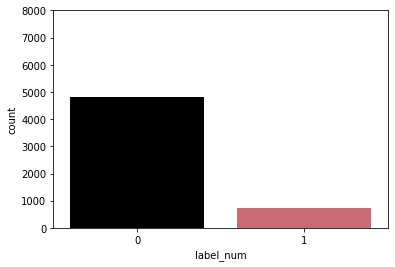

In [ ]:
sns.countplot(df_spam_ham_1['label_num'], palette=['#000000',"#D85A66"])
plt.ylim(0, 8000)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 8000.0)

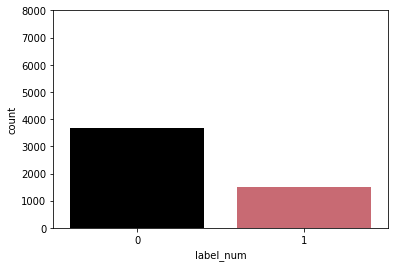

In [ ]:
sns.countplot(df_spam_ham_2['label_num'], palette=['#000000',"#D85A66"])
plt.ylim(0, 8000)

Concatenating two datasets into one

In [ ]:
df = pd.concat([df_spam_ham_1,df_spam_ham_2], ignore_index=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 8000.0)

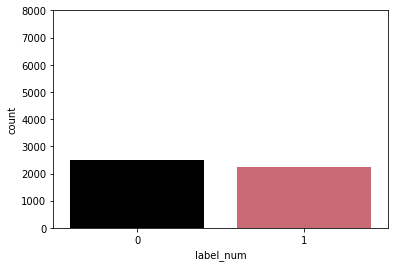

In [ ]:
sns.countplot(df['label_num'], palette=['#000000',"#D85A66"])
plt.ylim(0, 8000)

Removing rows with ham data to balance spam and ham messages

In [ ]:
remove_n = 6000
drop_indices = np.random.choice(df[df["label_num"] == 0].index, remove_n, replace=False)
df.drop(drop_indices, inplace=True)

In [ ]:
df.groupby('label_num').describe()

text                                    
          count unique                     top freq
label_num                                          
0          2497   2439  Sorry, I'll call later    7
1          2246   2115           Subject: \r\n   16

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


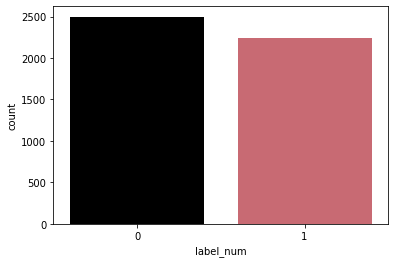

In [ ]:
sns.countplot(df['label_num'], palette=['#000000',"#D85A66"])

## Stopwords
Stopwords are words that are ignored during the text analysis process because they do not carry much semantic meaning and often occur frequently in texts.

In [ ]:
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words ]))

In [ ]:
df

,text,label_num
2,Free entry 2 wkly comp win FA Cup final tkts 2...,1
3,U dun say early hor ... U c already say ...,0
4,"Nah I n't think goes usf , lives around though",0
5,FreeMsg Hey darling 's 3 week 's word back ! I...,1
6,Even brother like speak . They treat like aids...,0
...,...,...
10734,Subject : anomaly boys 3881 uosda apaproved ml...,1
10736,Subject : slutty milf wants meet take ! ' ilaa...,1
10737,"Subject : fw : crosstex energy , driscoll ranc...",0
10738,Subject : put 10 ft transport volumes decrease...,0


## TF-IDF
TF-IDF (term frequency-inverse document frequency) is a method that allows to consider the importance of words in a document. This method is often used in natural language processing (NLP) to represent texts, and it involves transforming each text document into a feature vector.


In [ ]:
X = df["text"].values
y = df["label_num"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf_trans = tf.fit_transform(X_train).toarray()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']
def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale=['#000000',"#D85A66"])

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value'),
                      font_family = 'Old Standard TT',
                      autosize=False,
                      width=500,
                      height=500
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

# Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_trans, y_train)

LogisticRegression()

In [ ]:
test_tftrans = tf.transform(X_test).toarray()
pred = lr.predict(test_tftrans)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("classification report:\n",classification_report(y_test, pred))
print("confusion matrix:\n", confusion_matrix(y_test,pred))
print("accuracy score:\n",accuracy_score(y_test, pred))

classification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       761
           1       0.94      0.97      0.96       662

    accuracy                           0.96      1423
   macro avg       0.96      0.96      0.96      1423
weighted avg       0.96      0.96      0.96      1423

confusion matrix:
 [[723  38]
 [ 20 642]]
accuracy score:
 0.9592410400562192


In [ ]:
conf_matrix(confusion_matrix(y_test, pred))

# Naive Bayes model


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tf_trans, y_train)

MultinomialNB()

In [ ]:
pred_nb = nb.predict(test_tftrans)

In [ ]:
print("classification report:\n",classification_report(y_test, pred_nb))
print("confusion matrix:\n", confusion_matrix(y_test,pred_nb))
print("accuracy score:\n",accuracy_score(y_test, pred_nb))

classification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       761
           1       0.92      0.97      0.95       662

    accuracy                           0.95      1423
   macro avg       0.95      0.95      0.95      1423
weighted avg       0.95      0.95      0.95      1423

confusion matrix:
 [[708  53]
 [ 19 643]]
accuracy score:
 0.949402670414617


In [ ]:
conf_matrix(confusion_matrix(y_test, pred_nb))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, plot_confusion_matrix,classification_report, accuracy_score, f1_score
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f_score = []
accuracy_list = []


for i in [lr, nb]:
    pred = i.predict(test_tftrans)
    prec = precision_score(y_test, pred)
    recal = recall_score(y_test, pred)
    f1_s = f1_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f_score.append(f1_s)
    accuracy_list.append(accuracy)


In [ ]:
data = {'Precision':precision,
'Recall':recall,
'F1': f_score,
'Accuracy': accuracy_list
}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["Logistic regression", "Naive Bayes"])

In [ ]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(['#000000',"#D85A66"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1,Accuracy
Logistic regression,0.944118,0.969789,0.956781,0.959241
Naive Bayes,0.923851,0.971299,0.946981,0.949403
